In [33]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd
%matplotlib widget

def to_ms(ns):
    return ns / 1_000_000

In [42]:
sleep_ms = 50
config = {
    "path": {
        "bench_tcp": f"/Users/elvissabanovic/Projects/research-ml-inference/bench/zmq/build/tcp_metrics_{sleep_ms}sleep_ms.csv", # Sending 1M msgs took 01:05
        "bench_uds": f"/Users/elvissabanovic/Projects/research-ml-inference/bench/zmq/build/uds_metrics_{sleep_ms}sleep_ms.csv", # Sending 1M msgs took 01:01
        "extended_rr_uds": "/Users/elvissabanovic/Projects/research-ml-inference/data/extended_request_reply_1000000.csv",
    }
}

uds_df = pd.read_csv(config['path']['bench_uds'])
tcp_df = pd.read_csv(config['path']['bench_tcp'])

([<matplotlib.patches.Wedge at 0x14d08e1e0>,
 [Text(-0.33991877217145816, 1.046162142464278, 'uds > tcp'),
  Text(0.3399188701202255, -1.046162110638781, 'tcp > uds'),
  Text(1.0999999999999808, 2.0597886516129914e-07, 'uds == tcp')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.0%'),
  Text(0.18541029279285026, -0.5706338785302442, '40.0%'),
  Text(0.5999999999999894, 1.1235210826979952e-07, '0.0%')])

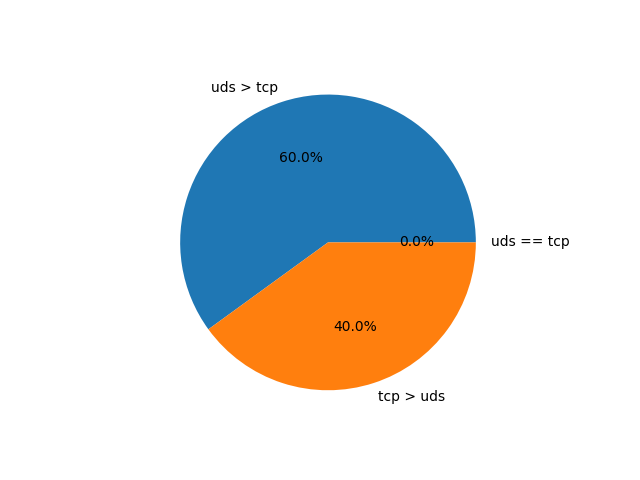

In [43]:
diff = tcp_df['response_time_ms'] - uds_df['response_time_ms']

uds_better_then_tcp = diff.where(lambda x: x > 0).dropna()
tcp_better_then_uds = diff.where(lambda x: x < 0).dropna()
equal = diff.where(lambda x: x == 0).dropna()

labels = ['uds > tcp', 'tcp > uds', 'uds == tcp']
data = [uds_better_then_tcp.count(), tcp_better_then_uds.count(), equal.count()]

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%')

In [44]:
uds_df['response_time_ms'].describe()

count    500.000000
mean       1.315458
std        1.495616
min        0.140292
25%        0.434365
50%        0.855042
75%        1.583710
max       15.203100
Name: response_time_ms, dtype: float64

In [45]:
tcp_df['response_time_ms'].describe()

count    500.000000
mean       1.447945
std        1.185535
min        0.239000
25%        0.685364
50%        0.975459
75%        1.790300
max        9.968540
Name: response_time_ms, dtype: float64

In [54]:
x = uds_df['response_time_ms'][:250]
# fig, ax = plt.subplots()
# ax.plot(x)
x.describe()

count    250.000000
mean       1.197028
std        1.546783
min        0.140292
25%        0.319094
50%        0.599145
75%        1.579172
max       15.203100
Name: response_time_ms, dtype: float64

In [55]:
r = tcp_df['response_time_ms'][:250]
# fig, ax = plt.subplots()
# ax.plot(r)

r.describe()

count    250.000000
mean       1.428732
std        1.150100
min        0.239000
25%        0.684968
50%        0.948625
75%        1.787145
max        7.635130
Name: response_time_ms, dtype: float64

In [18]:
path = "/Users/elvissabanovic/Projects/research-ml-inference/rust/extended_request_reply_1000.csv"

df = pd.read_csv(path)

In [19]:
df['elapsed_time_ns'].apply(to_ms).describe()

count    1000.000000
mean        1.246601
std         0.956949
min         0.420375
25%         0.781750
50%         0.893563
75%         1.147969
max         6.284708
Name: elapsed_time_ns, dtype: float64

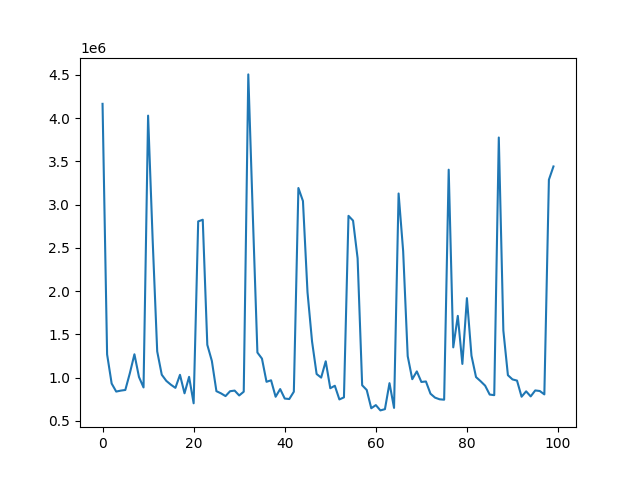

In [21]:
fig, ax = plt.subplots()
ax.plot(df['elapsed_time_ns'][0:100])

In [104]:
# 1. Add zmq to rtb-core
# 2. Compare and use Romans metrics // Important for Nikita
# 3. TCP over different pods
# 4. Roman needs to send me the right .pt model